# Directional Wells Trayectories

# Import Python Libraries

In [2]:
import welly
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%config Completer.use_jedi = False

## Import Data

In [3]:
Well_file = ""
with open(Well_file) as file:
    data = file.read()

In [5]:
data_xml = BeautifulSoup(data, 'html.parser')
params = set([str(tag.name) for tag in data_xml.find_all()])
#params

In [9]:
params = []
for tag in data_xml.find_all():
    params.append(str(tag.name))

In [14]:
params = set(params)
params

{'azi',
 'aziref',
 'azivertsect',
 'commondata',
 'dispew',
 'dispewvertsectorig',
 'dispns',
 'dispnsvertsectorig',
 'dls',
 'dtimcreation',
 'dtimlastchange',
 'dtimstn',
 'dtimtrajend',
 'dtimtrajstart',
 'gravaccelcorused',
 'gravtotalfieldreference',
 'gridcorused',
 'gtf',
 'incl',
 'itemstate',
 'magdeclused',
 'magdipanglereference',
 'magdrlstrcorused',
 'magtotalfieldreference',
 'magxaxialcorused',
 'md',
 'mddelta',
 'mdmn',
 'mdmx',
 'mtf',
 'name',
 'namewell',
 'namewellbore',
 'priv_customdata',
 'priv_dtimreceived',
 'priv_iplastchange',
 'priv_ipowner',
 'priv_userlastchange',
 'priv_userowner',
 'ratebuild',
 'rateturn',
 'sagcorused',
 'servicecompany',
 'sourcename',
 'statustrajstation',
 'trajectory',
 'trajectorys',
 'trajectorystation',
 'tvd',
 'tvddelta',
 'typesurveytool',
 'typetrajstation',
 'vertsect'}

In [20]:
tvd_temp = data_xml.find_all('incl')

In [21]:
tvd_temp[-1].text

'79.48'

In [27]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
df = pd.DataFrame()
for col in columns:
    df[col] = [float(x.text) for x in data_xml.find_all(col)]       

In [28]:
df

,azi,incl,md,tvd,dispns,dispew
0,0.00,0.00,0.0000,0.0000,-3.1700,3.5300
1,0.00,0.00,145.9000,145.9000,-3.1700,3.5300
2,253.69,0.15,153.4000,153.4000,-3.1728,3.5206
3,146.02,0.28,234.2000,234.1996,-3.3662,3.5294
4,136.21,0.78,274.6000,274.5978,-3.6465,3.7749
...,...,...,...,...,...,...
109,107.51,77.65,4524.2000,3185.9439,201.7164,1449.4273
110,107.84,80.05,4564.9000,3193.8139,189.5929,1487.4710
111,108.48,82.04,4605.4030,3200.1182,177.1232,1525.4852
112,108.37,82.04,4645.7049,3205.6993,164.5080,1563.3527


In [31]:
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

preffix = "Data/input/"
suffix = "/1.xml"

df_all_wells = pd.DataFrame()
for well in wells:
    df = pd.DataFrame()
    WITSML_file = path + preffix + well + suffix
    with open(WITSML_file) as f:
        data = f.read()
    data_xml = BeautifulSoup(data, 'html.parser')
    for col in columns:
        df[col] = [float(x.text) for x in data_xml.find_all(col)]
    df['Well'] = well
    df_all_wells = pd.concat([df_all_wells, df], ignore_index=True)

In [32]:
df_all_wells

,azi,incl,md,tvd,dispns,dispew,Well
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9-F-12
1,0.000000,0.000000,145.899994,145.899994,0.000000,0.000000,9-F-12
2,2.900912,0.002094,174.000000,173.999979,-0.028578,0.007014,9-F-12
3,2.788861,0.001396,204.000000,203.999933,-0.078743,0.021738,9-F-12
4,1.976934,0.002618,234.000000,233.999877,-0.113912,0.065049,9-F-12
...,...,...,...,...,...,...,...
856,0.930959,0.146084,3292.200000,3087.733117,719.307958,389.952176,9-F-1 C
857,0.998677,0.078540,3332.300000,3127.573073,721.903240,393.617445,9-F-1 C
858,0.918916,0.075747,3372.800000,3167.952736,723.693135,396.171430,9-F-1 C
859,0.985238,0.075224,3413.200000,3208.237774,725.459525,398.651792,9-F-1 C


In [35]:
df_all_wells.Well.unique()

array(['9-F-12', '9-F-14', '9-F-15', '9-F-11', '9-F-9', '9-F-7', '9-F-5',
       '9-F-4', '9-F-1 C'], dtype=object)

In [49]:
df_all_wells.loc[df_all_wells['Well'] == '9-F-12', ['azi', 'Well']]

,azi,Well
0,0.000000,9-F-12
1,0.000000,9-F-12
2,2.900912,9-F-12
3,2.788861,9-F-12
4,1.976934,9-F-12
...,...,...
207,1.860346,9-F-12
208,1.867851,9-F-12
209,1.862964,9-F-12
210,1.842893,9-F-12


In [39]:
df_all_wells.groupby('Well')['tvd'].mean()

Well
9-F-1 C    1612.699136
9-F-11     1756.344971
9-F-12     1642.833575
9-F-14     1844.793447
9-F-15     1619.884283
9-F-4      1728.137265
9-F-5      1773.009943
9-F-7       456.369096
9-F-9       598.263832
Name: tvd, dtype: float64

In [40]:
df_all_wells['neg_tvd'] = df_all_wells['tvd']*-1

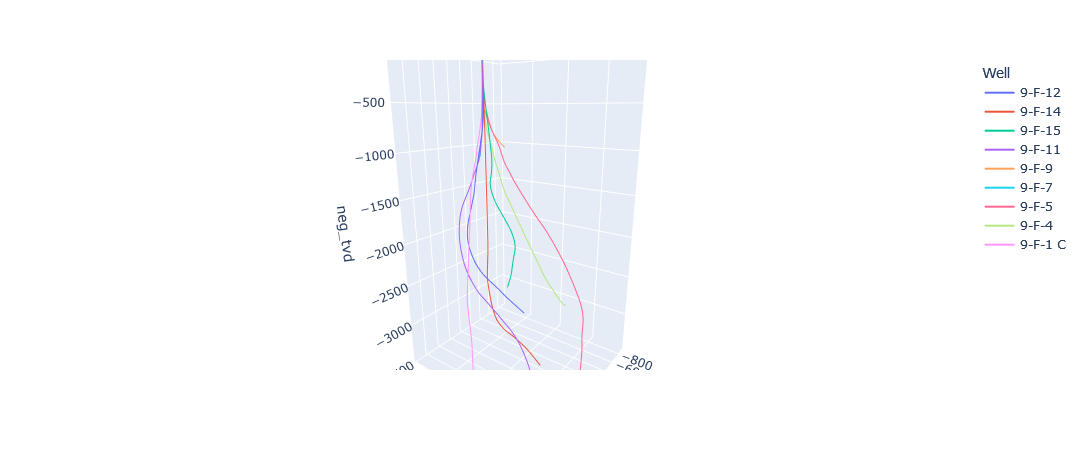

In [44]:
fig = px.line_3d(df_all_wells, 'dispns', 'dispew', 'neg_tvd', 'Well')
fig.show()

# EDA (EXploratory Data Analysis)

<AxesSubplot:>

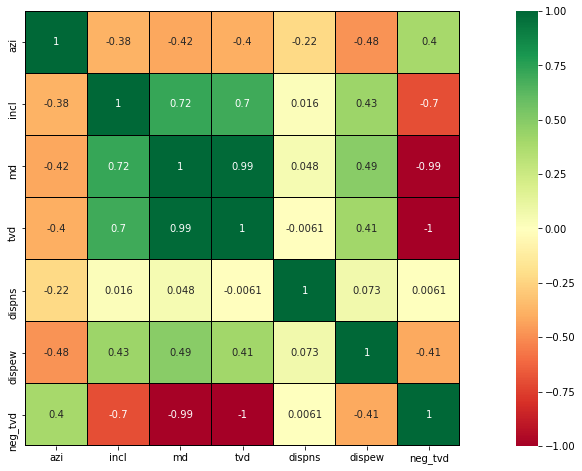

In [17]:
corr = df_all_wells.corr()

fig, ax1 = plt.subplots(figsize=(20,8))
sns.heatmap(data=corr, cmap='RdYlGn', annot=True, linewidths=0.01, linecolor='black', square=True, ax=ax1)

## Plots for Categorical Variables

<AxesSubplot:xlabel='Well', ylabel='md'>

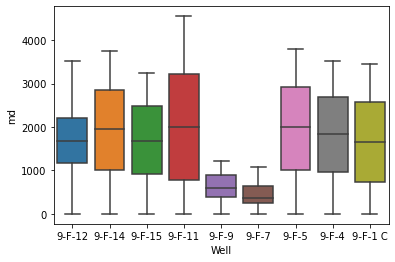

In [18]:
sns.boxplot(data=df_all_wells, x='Well', y='md')

<AxesSubplot:xlabel='Well', ylabel='tvd'>

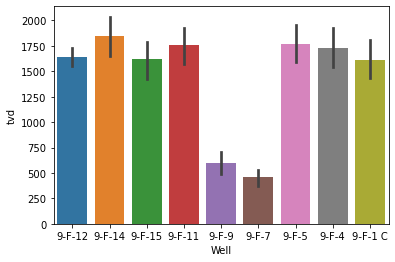

In [19]:
sns.barplot(data=df_all_wells, x='Well', y='tvd')

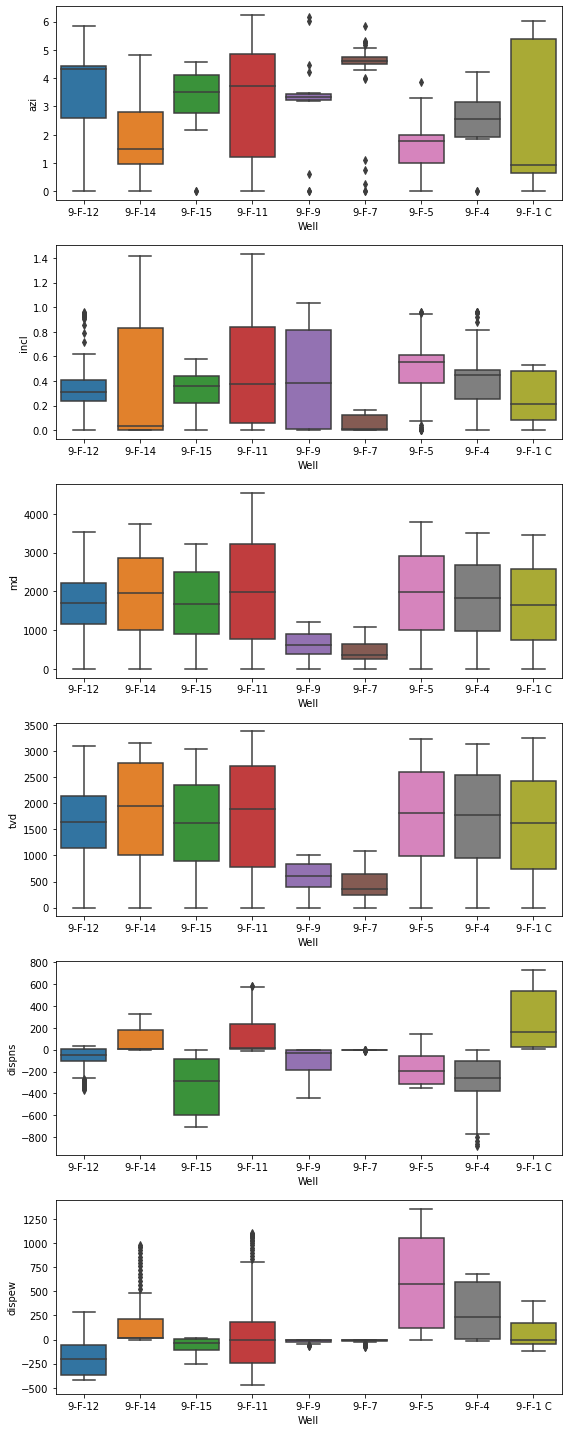

In [20]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
fig, ax = plt.subplots(len(columns), 1, figsize=(8,20))

for col, axes in zip(columns, ax):
    sns.boxplot(data=df_all_wells, x='Well', y=col, ax=axes)
    plt.tight_layout()

## Plots for Numeric Variables

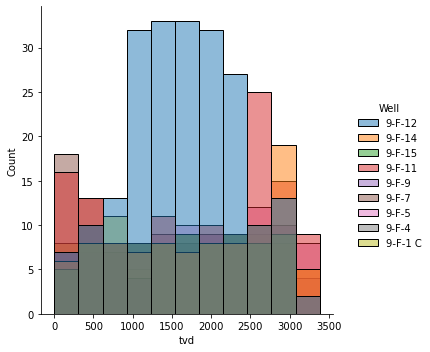

In [21]:
sns.displot(data=df_all_wells, x='tvd', hue='Well')

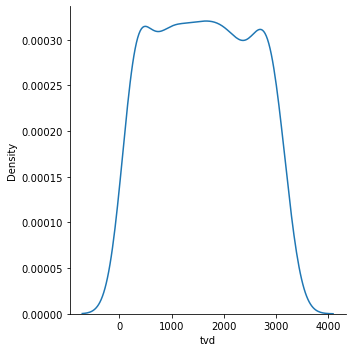

In [22]:
sns.displot(data=df_all_wells, x='tvd', kind='kde')